<a href="https://colab.research.google.com/github/alaa126458/Data-analysis/blob/main/salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#salary prediction using linear regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
salary_data=pd.read_csv('Salary.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
print("#numbers of original data "+str(len(salary_data)))

#numbers of original data 35


<Axes: ylabel='Frequency'>

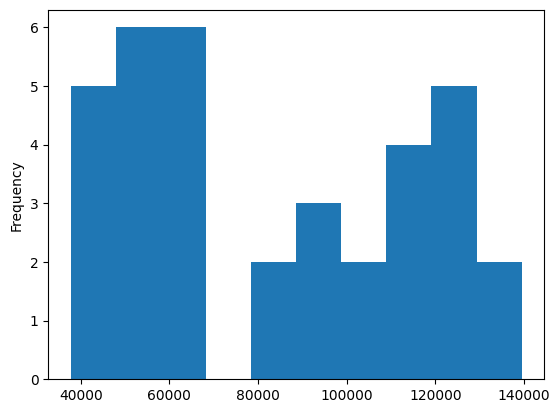

In [8]:
salary_data["Salary"].plot.hist()

In [9]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [12]:
salary_data.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [13]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


<Axes: >

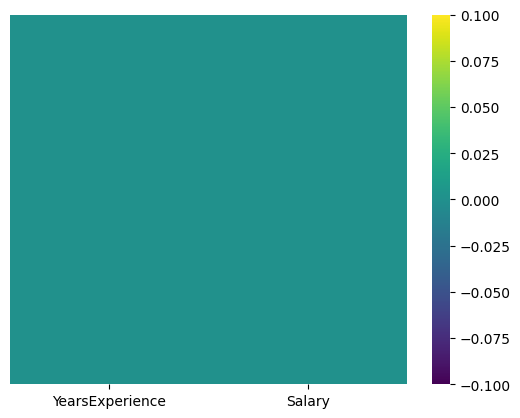

In [14]:
sns.heatmap(salary_data.isnull(),yticklabels=False,cmap='viridis')

<Axes: xlabel='YearsExperience', ylabel='Salary'>

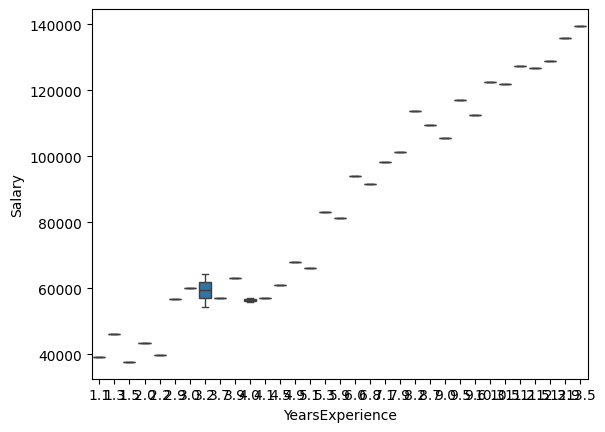

In [19]:
sns.boxplot(x="YearsExperience",y="Salary",data=salary_data)

In [20]:
x=salary_data.drop('Salary',axis=1)
y=salary_data['Salary']

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Convert x_train and x_test to NumPy arrays before scaling
x_train_np = x_train.to_numpy()
x_test_np = x_test.to_numpy()

# Scale the NumPy arrays
x_train_scaled = sc.fit_transform(x_train_np)
x_test_scaled = sc.transform(x_test_np)

# Convert the scaled NumPy arrays back to Pandas DataFrames if needed
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [26]:
# If you are trying to predict a continuous target variable use Linear Regression
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(x_train_scaled,y_train)

LinearRegression()

In [27]:
y_pred=classifier.predict(x_test_scaled)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 39911665.6848326
R-squared: 0.9484256766712261


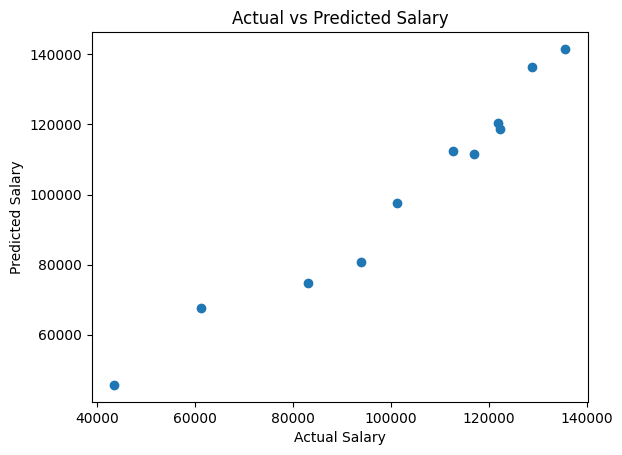

In [29]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()


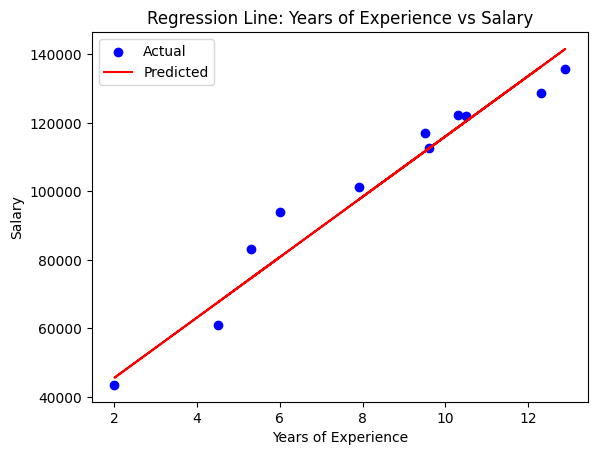

In [30]:
# Plot data points
plt.scatter(x_test, y_test, color='blue', label='Actual')

# Plot the regression line
plt.plot(x_test, y_pred, color='red', label='Predicted')

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Regression Line: Years of Experience vs Salary")
plt.legend()
plt.show()


In [31]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(classifier, x_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R-squared scores: {cv_scores}")
print(f"Average R-squared: {np.mean(cv_scores)}")


Cross-Validation R-squared scores: [ 0.9396199   0.9651282   0.96068415  0.78409999 -2.93978918]
Average R-squared: 0.14194861165359346


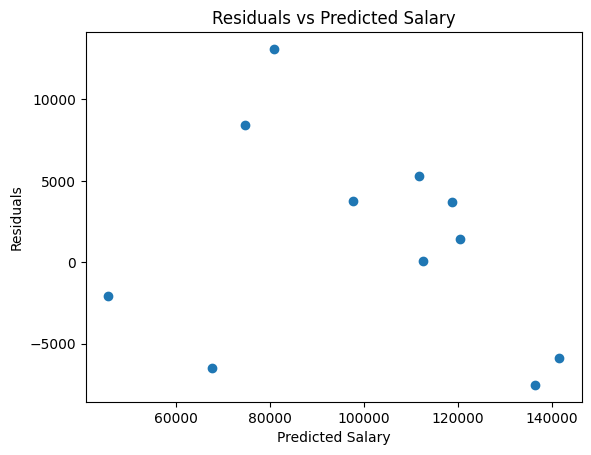

In [32]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Salary")
plt.show()
